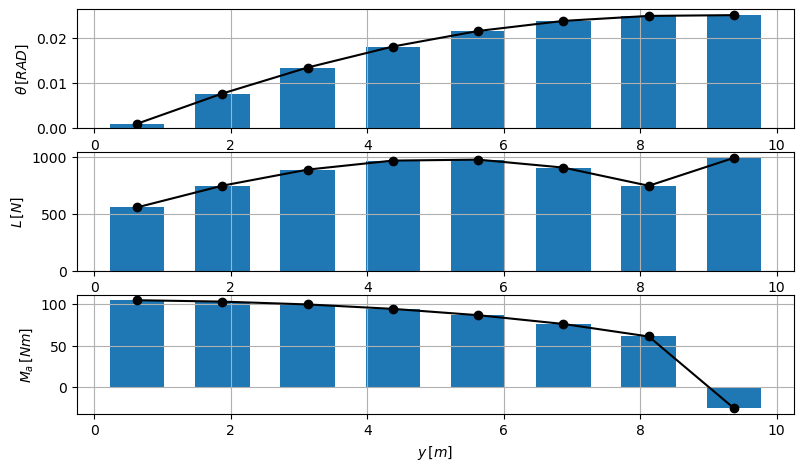

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

cla = 2*np.pi
cld = 1.3
cmd = -1.0 
chord = 1.
cm0 = 0.01
cl0 = 0.10 
e = 0.2*chord
alpha_0 = 1.0*np.pi/180.

n_segments = 8 

span = 10. 
span_segment = span/n_segments
area_segment = chord*span_segment
y_segments = np.linspace(span_segment*0.5,span-0.5*span_segment,n_segments)
tip_loss = np.sqrt(1-(y_segments/span)**2)

GJ = 200000.
k_theta = GJ/span_segment

k = k_theta*(2*np.diag(np.ones(n_segments))-np.diag(np.ones(n_segments-1),-1)-np.diag(np.ones(n_segments-1),1))
k [0,0] += 1e6
k [n_segments-1,n_segments-1] = k_theta

ka = cla*e*area_segment*np.diag(tip_loss)

rho = 1.2
v = 80. 
q = 0.5*rho*v**2

kael = k -q*ka

# aileron deflection 
delta = 0.25 

# aerodynamic loading 
ma = q * area_segment*e*tip_loss*cla*alpha_0
ma[-1] += q * area_segment*e*tip_loss[-1]*(e*cld + chord*cmd)*delta

theta = linalg.inv(kael)@ma 
lift = q * area_segment*tip_loss*( cla*(alpha_0 + theta) ) 
lift[-1] = q * area_segment*tip_loss[-1]*( cla*(alpha_0 + theta[-1]) + cld*delta)


fig, ax = plt.subplots(3,1)
fig.set_size_inches(9.25, 5.25)
ax[0].bar(y_segments,theta)
ax[0].plot(y_segments,theta, 'ko-')
ax[0].set_xlabel(r'$y\,[m]$')        
ax[0].set_ylabel(r'$\theta\,[RAD]$')        

ax[0].grid()
ax[1].plot(y_segments,lift, 'ko-')
ax[1].bar(y_segments,lift)
ax[1].set_xlabel(r'$y\,[m]$')        
ax[1].set_ylabel(r'$L\,[N]$')        
ax[1].grid()

ax[2].plot(y_segments,ma,'ko-')
ax[2].bar(y_segments,ma)
ax[2].set_xlabel(r'$y\,[m]$')        
ax[2].set_ylabel(r'$M_a\,[Nm]$')        
ax[2].grid()
plt.show()

